In [1]:
import numpy as np
import pandas as pd

In [2]:
energy = pd.read_excel("Energy Indicators.xls", skiprows = 17, skipfooter = 38)
energy
energy.drop(columns = ["Unnamed: 0", "Unnamed: 1"], axis=1, inplace=True)

energy.rename(columns = {"Unnamed: 2": "Country",
                         "Petajoules": "Energy Supply",
                         "Gigajoules": "Energy Supply per Capita",
                         "%": "% Renewable"}, inplace = True)
energy.replace("...", np.NaN, inplace = True)
energy[["Energy Supply", "Energy Supply per Capita"]] = energy[["Energy Supply", 
                                                            "Energy Supply per Capita"]].astype('Int64')
energy["Energy Supply"] = energy["Energy Supply"] * 1000000
energy["Country"] = energy["Country"].str.replace(r"\s\(.*\)","")
energy["Country"] = energy["Country"].str.replace(r"\d*","")
energy["Country"] = energy["Country"].str.replace("Republic of Korea", "South Korea")
energy["Country"] = energy["Country"].str.replace("United States of America",
                                                  "United States")
energy["Country"] = energy["Country"].str.replace("United Kingdom of Great Britain and Northern Ireland",
                                                  "United Kingdom")
energy["Country"] = energy["Country"].str.replace("China, Hong Kong Special Administrative Regio",
                                                  "Hong Kong")
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000,10,78.669280
1,Albania,102000000,35,100.000000
2,Algeria,1959000000,51,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9000000,121,88.695650
...,...,...,...,...
222,Viet Nam,2554000000,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344000000,13,0.000000
225,Zambia,400000000,26,99.714670


In [3]:
GDP = pd.read_csv("world_bank.csv")
GDP["Country Name"] = GDP["Country Name"].str.replace("Korea, Rep.", "South Korea")
GDP["Country Name"] = GDP["Country Name"].str.replace("Iran, Islamic Rep.", "Iran")
GDP["Country Name"] = GDP["Country Name"].str.replace("Hong Kong SAR, China", "Hong Kong")


In [4]:
ScimEn = pd.read_excel("scimagojr.xlsx")
ScimEn

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,193483,192270,1355524,927458,7.01,196
1,2,United States,143130,139924,1551044,530169,10.84,301
2,3,Japan,41188,40775,357829,93375,8.69,166
3,4,United Kingdom,33293,32300,405816,77019,12.19,185
4,5,India,32064,31167,268746,87658,8.38,153
...,...,...,...,...,...,...,...,...
192,193,Liberia,1,1,18,0,18.00,1
193,194,Kiribati,1,1,1,0,1.00,1
194,195,Comoros,1,1,0,0,0.00,0
195,196,Montserrat,1,1,1,0,1.00,1


In [5]:
GDP = GDP.set_index("Country Name")

ScimEn = ScimEn.set_index("Country")

energy = energy.set_index("Country")

#result = pd.merge(GDP, ScimEn, how = "inner", left_index = True, right_index = True)
#result

In [6]:
result = pd.merge(GDP, ScimEn, how = "inner", left_index = True, right_index = True)

In [7]:
result = pd.merge(result, energy, how = "inner", left_index = True, right_index = True)

In [8]:
result = result[['Rank', 'Documents', 'Citable documents', 'Citations', 
                'Self-citations', 'Citations per document', 'H index', 
                'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
                '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 
                '2014', '2015']]
top_15 = result[result["Rank"] <= 15]

In [9]:
top_15.sort_values(by = "Rank")

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1,193483,192270,1355524,927458,7.01,196,127191000000,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,143130,139924,1551044,530169,10.84,301,90838000000,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,41188,40775,357829,93375,8.69,166,18984000000,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,33293,32300,405816,77019,12.19,185,7920000000,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
India,5,32064,31167,268746,87658,8.38,153,33195000000,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
Germany,6,27966,27370,278237,59495,9.95,166,13261000000,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
Russian Federation,7,26435,26196,68424,29544,2.59,75,30709000000,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,8,26148,25571,395467,74112,15.12,193,10431000000,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
France,9,19696,19214,238639,48462,12.12,152,10597000000,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
Italy,10,18773,17987,221652,54282,11.81,135,6530000000,109,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12


In [10]:
outer_merge = pd.merge(ScimEn, GDP, how = "outer", left_index = True, right_index = True)

In [11]:
outer_merge = pd.merge(outer_merge, energy, how = "outer", left_index = True, right_index = True)

In [12]:
len(outer_merge) - len(result)

156

In [13]:
row = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"]
average_gdp = top_15.apply(lambda x: np.mean(x[row]), axis = 1)
average_gdp.sort_values(ascending = False, inplace = True)
average_gdp

United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [14]:
target_country = average_gdp.index[5]
top_15_GDP = top_15[row]
start_value = top_15_GDP.loc[target_country, "2006"]
end_value = top_15_GDP.loc[target_country, "2015"]
diff = abs(start_value - end_value)
diff

246702696075.3999

In [15]:
np.mean(top_15["Energy Supply per Capita"])

157.6

In [16]:
renew = top_15["% Renewable"].sort_values(ascending = False)

(renew.index[0], renew.iloc[0])

('Brazil', 69.64803)

In [17]:

ratio = top_15["Self-citations"] / top_15["Citations"]
top_15_alter = top_15.copy()
top_15_alter["Citaions Ratio"] = ratio
ratio.sort_values(ascending = False, inplace = True)
(ratio.index[0], ratio.iloc[0])

('China', 0.684206255293156)

In [18]:
population = top_15["Energy Supply"] / top_15["Energy Supply per Capita"]
top_15_alter["Population"] = population
population.sort_values(ascending = False, inplace = True)
population.index[2]

'United States'

In [19]:
cdpp = top_15["Citable documents"] / top_15_alter["Population"]
top_15_alter["Citable Documents per Person"] = cdpp
top_15_alter

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,Citaions Ratio,Population,Citable Documents per Person
Australia,14,14907,14564,196567,34134,13.19,143,5386000000,231,11.810810,...,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12,0.173651,2.331602e+07,0.000625
Brazil,13,15332,15132,118483,28818,7.73,109,12149000000,59,69.648030,...,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,0.243225,2.059153e+08,0.000073
Canada,8,26148,25571,395467,74112,15.12,193,10431000000,296,61.945430,...,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.187404,3.523986e+07,0.000726
China,1,193483,192270,1355524,927458,7.01,196,127191000000,93,19.754910,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.684206,1.367645e+09,0.000141
Germany,6,27966,27370,278237,59495,9.95,166,13261000000,165,17.901530,...,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.213828,8.036970e+07,0.000341
Spain,15,14204,13916,233955,42632,16.47,149,4923000000,106,37.968590,...,1.431475e+12,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12,0.182223,4.644340e+07,0.000300
France,9,19696,19214,238639,48462,12.12,152,10597000000,166,17.020280,...,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.203077,6.383735e+07,0.000301
United Kingdom,4,33293,32300,405816,77019,12.19,185,7920000000,124,10.600470,...,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.189788,6.387097e+07,0.000506
India,5,32064,31167,268746,87658,8.38,153,33195000000,26,14.969080,...,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.326174,1.276731e+09,0.000024
Iran,12,15614,15334,160505,51493,10.28,108,9172000000,119,5.707721,...,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN,0.320819,7.707563e+07,0.000199


In [20]:
espc_series = top_15_alter["Energy Supply per Capita"].copy()
espc_series = espc_series.astype("float")
ans = top_15_alter["Citable Documents per Person"].corr(espc_series)
ans

0.7676145948586388

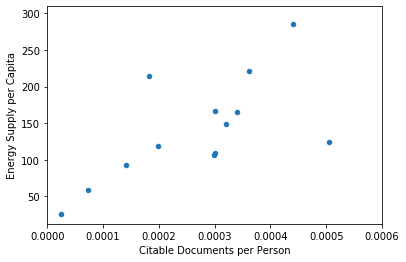

In [21]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    top_15_alter.plot(x='Citable Documents per Person', y='Energy Supply per Capita', 
                      kind='scatter', xlim=[0, 0.0006])
plot9()

In [22]:
median_value = np.median(top_15_alter["% Renewable"])
def renewable_rank(row):
    data = row["% Renewable"]
    if data >= median_value:
        row["HighRenew"] = 1
    else:
        row["HighRenew"] = 0
    return row
top_15_alter = top_15_alter.apply(renewable_rank, axis = 1)
top_15_alter.sort_values(by = "Rank", inplace = True)


In [23]:
top_15_alter["Rank"] = top_15_alter["Rank"].astype("int")

In [24]:
top_15_alter[["Documents", "Citable documents", "Citations", "Self-citations", 
              "Energy Supply per Capita", "HighRenew"]] = top_15_alter[["Documents", 
                                                                        "Citable documents", 
                                                                        "Citations", 
                                                                        "Self-citations", 
                                                                        "Energy Supply per Capita", 
                                                                        "HighRenew"]].astype("int")
top_15_alter

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Citaions Ratio,Population,Citable Documents per Person,HighRenew
China,1,193483,192270,1355524,927458,7.01,196,127191000000,93,19.754910,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.684206,1.367645e+09,0.000141,1
United States,2,143130,139924,1551044,530169,10.84,301,90838000000,286,11.570980,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.341814,3.176154e+08,0.000441,0
Japan,3,41188,40775,357829,93375,8.69,166,18984000000,149,10.232820,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.260949,1.274094e+08,0.000320,0
United Kingdom,4,33293,32300,405816,77019,12.19,185,7920000000,124,10.600470,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.189788,6.387097e+07,0.000506,0
India,5,32064,31167,268746,87658,8.38,153,33195000000,26,14.969080,...,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.326174,1.276731e+09,0.000024,0
Germany,6,27966,27370,278237,59495,9.95,166,13261000000,165,17.901530,...,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.213828,8.036970e+07,0.000341,1
Russian Federation,7,26435,26196,68424,29544,2.59,75,30709000000,214,17.288680,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.431778,1.435000e+08,0.000183,1
Canada,8,26148,25571,395467,74112,15.12,193,10431000000,296,61.945430,...,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.187404,3.523986e+07,0.000726,1
France,9,19696,19214,238639,48462,12.12,152,10597000000,166,17.020280,...,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.203077,6.383735e+07,0.000301,1
Italy,10,18773,17987,221652,54282,11.81,135,6530000000,109,33.667230,...,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,0.244897,5.990826e+07,0.000300,1


In [25]:
top_15_alter["HighRenew"]

China                 1
United States         0
Japan                 0
United Kingdom        0
India                 0
Germany               1
Russian Federation    1
Canada                1
France                1
Italy                 1
South Korea           0
Iran                  0
Brazil                1
Australia             0
Spain                 1
Name: HighRenew, dtype: int32

In [26]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [27]:
top_15_alter["Continent"] = pd.Series(ContinentDict)
top_15_alter

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,Citaions Ratio,Population,Citable Documents per Person,HighRenew,Continent
China,1,193483,192270,1355524,927458,7.01,196,127191000000,93,19.754910,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.684206,1.367645e+09,0.000141,1,Asia
United States,2,143130,139924,1551044,530169,10.84,301,90838000000,286,11.570980,...,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.341814,3.176154e+08,0.000441,0,North America
Japan,3,41188,40775,357829,93375,8.69,166,18984000000,149,10.232820,...,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.260949,1.274094e+08,0.000320,0,Asia
United Kingdom,4,33293,32300,405816,77019,12.19,185,7920000000,124,10.600470,...,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.189788,6.387097e+07,0.000506,0,Europe
India,5,32064,31167,268746,87658,8.38,153,33195000000,26,14.969080,...,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.326174,1.276731e+09,0.000024,0,Asia
Germany,6,27966,27370,278237,59495,9.95,166,13261000000,165,17.901530,...,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.213828,8.036970e+07,0.000341,1,Europe
Russian Federation,7,26435,26196,68424,29544,2.59,75,30709000000,214,17.288680,...,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.431778,1.435000e+08,0.000183,1,Europe
Canada,8,26148,25571,395467,74112,15.12,193,10431000000,296,61.945430,...,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.187404,3.523986e+07,0.000726,1,North America
France,9,19696,19214,238639,48462,12.12,152,10597000000,166,17.020280,...,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.203077,6.383735e+07,0.000301,1,Europe
Italy,10,18773,17987,221652,54282,11.81,135,6530000000,109,33.667230,...,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,0.244897,5.990826e+07,0.000300,1,Europe


In [31]:
top_15_alter.groupby("Continent")["Population"].agg(size = np.size, Sum = np.sum, 
                                                    mean = np.mean, std = np.std)

,size,Sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [32]:
top_15_alter

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,Citaions Ratio,Population,Citable Documents per Person,HighRenew,Continent
China,1,193483,192270,1355524,927458,7.01,196,127191000000,93,19.754910,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.684206,1.367645e+09,0.000141,1,Asia
United States,2,143130,139924,1551044,530169,10.84,301,90838000000,286,11.570980,...,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.341814,3.176154e+08,0.000441,0,North America
Japan,3,41188,40775,357829,93375,8.69,166,18984000000,149,10.232820,...,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.260949,1.274094e+08,0.000320,0,Asia
United Kingdom,4,33293,32300,405816,77019,12.19,185,7920000000,124,10.600470,...,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.189788,6.387097e+07,0.000506,0,Europe
India,5,32064,31167,268746,87658,8.38,153,33195000000,26,14.969080,...,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.326174,1.276731e+09,0.000024,0,Asia
Germany,6,27966,27370,278237,59495,9.95,166,13261000000,165,17.901530,...,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.213828,8.036970e+07,0.000341,1,Europe
Russian Federation,7,26435,26196,68424,29544,2.59,75,30709000000,214,17.288680,...,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.431778,1.435000e+08,0.000183,1,Europe
Canada,8,26148,25571,395467,74112,15.12,193,10431000000,296,61.945430,...,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.187404,3.523986e+07,0.000726,1,North America
France,9,19696,19214,238639,48462,12.12,152,10597000000,166,17.020280,...,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.203077,6.383735e+07,0.000301,1,Europe
Italy,10,18773,17987,221652,54282,11.81,135,6530000000,109,33.667230,...,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,0.244897,5.990826e+07,0.000300,1,Europe


In [35]:
top_15_v2 = top_15_alter.reset_index()
renewable_group = pd.cut(top_15_v2["% Renewable"], 5)
renewable_group

0     (15.753, 29.227]
1      (2.212, 15.753]
2      (2.212, 15.753]
3      (2.212, 15.753]
4      (2.212, 15.753]
5     (15.753, 29.227]
6     (15.753, 29.227]
7     (56.174, 69.648]
8     (15.753, 29.227]
9     (29.227, 42.701]
10     (2.212, 15.753]
11     (2.212, 15.753]
12    (56.174, 69.648]
13     (2.212, 15.753]
14    (29.227, 42.701]
Name: % Renewable, dtype: category
Categories (5, interval[float64]): [(2.212, 15.753] < (15.753, 29.227] < (29.227, 42.701] < (42.701, 56.174] < (56.174, 69.648]]

In [38]:
top_15_v2["Renewable bins"] = renewable_group
top_15_v2

,index,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2012,2013,2014,2015,Citaions Ratio,Population,Citable Documents per Person,HighRenew,Continent,Renewable bins
0,China,1,193483,192270,1355524,927458,7.01,196,127191000000,93,...,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.684206,1.367645e+09,0.000141,1,Asia,"(15.753, 29.227]"
1,United States,2,143130,139924,1551044,530169,10.84,301,90838000000,286,...,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.341814,3.176154e+08,0.000441,0,North America,"(2.212, 15.753]"
2,Japan,3,41188,40775,357829,93375,8.69,166,18984000000,149,...,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.260949,1.274094e+08,0.000320,0,Asia,"(2.212, 15.753]"
3,United Kingdom,4,33293,32300,405816,77019,12.19,185,7920000000,124,...,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.189788,6.387097e+07,0.000506,0,Europe,"(2.212, 15.753]"
4,India,5,32064,31167,268746,87658,8.38,153,33195000000,26,...,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.326174,1.276731e+09,0.000024,0,Asia,"(2.212, 15.753]"
5,Germany,6,27966,27370,278237,59495,9.95,166,13261000000,165,...,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.213828,8.036970e+07,0.000341,1,Europe,"(15.753, 29.227]"
6,Russian Federation,7,26435,26196,68424,29544,2.59,75,30709000000,214,...,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.431778,1.435000e+08,0.000183,1,Europe,"(15.753, 29.227]"
7,Canada,8,26148,25571,395467,74112,15.12,193,10431000000,296,...,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.187404,3.523986e+07,0.000726,1,North America,"(56.174, 69.648]"
8,France,9,19696,19214,238639,48462,12.12,152,10597000000,166,...,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.203077,6.383735e+07,0.000301,1,Europe,"(15.753, 29.227]"
9,Italy,10,18773,17987,221652,54282,11.81,135,6530000000,109,...,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,0.244897,5.990826e+07,0.000300,1,Europe,"(29.227, 42.701]"


In [39]:
top_15_v2.groupby(['Continent','Renewable bins']).size()

Continent      Renewable bins  
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [42]:
PopEst = top_15_alter["Population"].copy()
PopEst

China                 1.367645e+09
United States         3.176154e+08
Japan                 1.274094e+08
United Kingdom        6.387097e+07
India                 1.276731e+09
Germany               8.036970e+07
Russian Federation    1.435000e+08
Canada                3.523986e+07
France                6.383735e+07
Italy                 5.990826e+07
South Korea           4.980543e+07
Iran                  7.707563e+07
Brazil                2.059153e+08
Australia             2.331602e+07
Spain                 4.644340e+07
Name: Population, dtype: float64

In [44]:
PopEst.astype("str")

China                 1367645161.2903225
United States         317615384.61538464
Japan                 127409395.97315437
United Kingdom        63870967.741935484
India                 1276730769.2307692
Germany                80369696.96969697
Russian Federation           143500000.0
Canada                 35239864.86486486
France                 63837349.39759036
Italy                 59908256.880733944
South Korea           49805429.864253394
Iran                   77075630.25210084
Brazil                205915254.23728815
Australia             23316017.316017315
Spain                   46443396.2264151
Name: Population, dtype: object

In [45]:
PopEst.apply(lambda x: "{:,}".format(x))

China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
India                 1,276,730,769.2307692
Germany                 80,369,696.96969697
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
France                  63,837,349.39759036
Italy                  59,908,256.880733944
South Korea            49,805,429.864253394
Iran                    77,075,630.25210084
Brazil                 205,915,254.23728815
Australia              23,316,017.316017315
Spain                    46,443,396.2264151
Name: Population, dtype: object

In [49]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    
    ax = top_15_alter.plot(x='Rank', y='% Renewable', kind='scatter', 
                           c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c', 
                              '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                           xticks=range(1,16), s=6*top_15_alter['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(top_15_alter.index):
        ax.annotate(txt, [top_15_alter['Rank'][i], top_15_alter['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


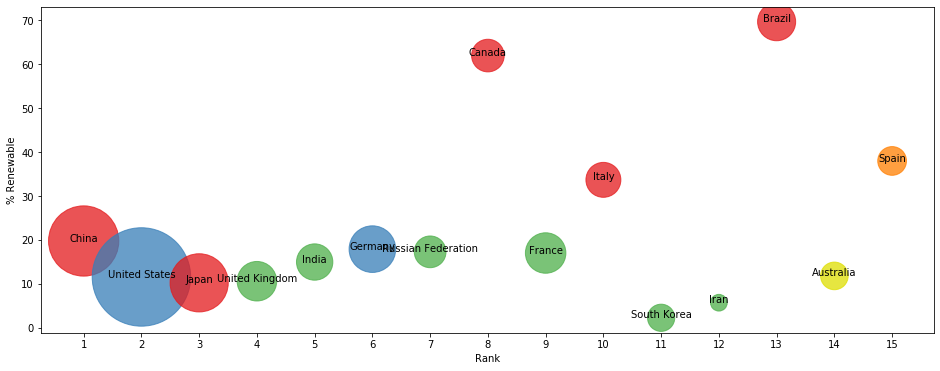

In [50]:
plot_optional()